<a href="https://colab.research.google.com/github/nehadeshmukh2003/Brain-tumer-detection/blob/main/brain_tumor_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
import os
import random
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import StandardScaler

In [ ]:
# pip install opencv-python

In [ ]:
input_dir= "/content/drive/My Drive/DS Worksop/DS Workshop/Brain Tumor Prediction"
class_names = os.listdir(input_dir)
class_names

['Yes', 'No']

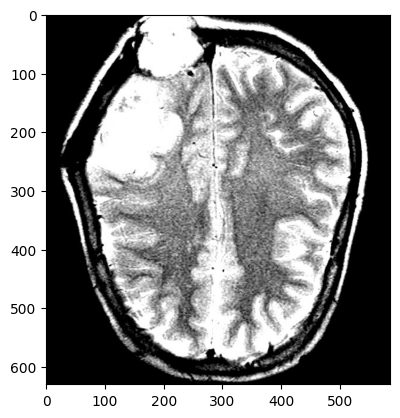

In [ ]:
pred_dir= "/content/drive/My Drive/DS Worksop/DS Workshop/Brain Tumor Prediction/Yes/y1.jpg"
img = cv2.imread(pred_dir)
plt.imshow(img)

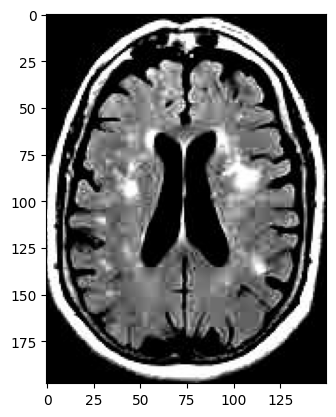

In [ ]:

pred_dir= "/content/drive/My Drive/DS Worksop/DS Workshop/Brain Tumor Prediction/No/no1.jpg"
img = cv2.imread(pred_dir)
plt.imshow(img)

In [ ]:
yes_path =  "/content/drive/My Drive/DS Worksop/DS Workshop/Brain Tumor Prediction/Yes"
no_path =  "/content/drive/My Drive/DS Worksop/DS Workshop/Brain Tumor Prediction/No"

In [ ]:
# Load VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (50, 50))  # Resize images to 224x224
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)

    # Extract features using VGG16
    features = model.predict(img)
    return features.flatten()

print("VGG16 Model loaded sucessufully.!!")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
VGG16 Model loaded sucessufully.!!


In [ ]:
# List of class names and corresponding labels
class_names = ['No','Yes']
class_labels = {class_name: label for label, class_name in enumerate(class_names)}

In [ ]:
class_labels

{'No': 0, 'Yes': 1}

In [ ]:

images_yes = []
label_yes = []

for filename in os.listdir(yes_path):
    image_path = os.path.join(yes_path,filename)
    features = extract_features(image_path)
    images_yes.append(features)
    label_yes.append("Yes")

df_yes = pd.DataFrame(images_yes,columns=[f'Feature_{i}' for i in range(len(images_yes[0]))])
df_yes["Label"] = label_yes

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━

In [ ]:
images_no = []
label_no = []

for filename in os.listdir(no_path):
    image_path = os.path.join(no_path,filename)
    features = extract_features(image_path)
    images_no.append(features)
    label_no.append("no")

df_no = pd.DataFrame(images_no,columns=[f'Feature_{i}' for i in range(len(images_no[0]))])
df_no["Label"] = label_no

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [ ]:
df_yes.shape

(200, 513)

In [ ]:
df_no.shape

(200, 513)

In [ ]:
feature_df =pd.concat([df_yes,df_no])
feature_df.shape

(400, 513)

In [ ]:
X = feature_df.drop("Label",axis=1)
y = feature_df['Label']

In [ ]:
X

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_502,Feature_503,Feature_504,Feature_505,Feature_506,Feature_507,Feature_508,Feature_509,Feature_510,Feature_511
0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,4.732503,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
196,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.996336,0.0,0.0,0.0,0.0,0.0
197,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
198,0.0,0.000000,3.50803,4.513357,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.476276,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
print("X_train = ",X_train.shape)
print("X_test = ",X_test.shape)

print("y_train = ",y_train.shape)
print("y_test = ",y_test.shape)

X_train =  (280, 512)
X_test =  (120, 512)
y_train =  (280,)
y_test =  (120,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print("Model Created")

model.fit(X_train,y_train)
print("Model Training Completed")

y_pred = model.predict(X_test)

acc = accuracy_score(y_test , y_pred)
print("Accuracy :- ",acc*100)
print("Error rate = ",1-acc)

Model Created
Model Training Completed
Accuracy :-  89.16666666666667
Error rate =  0.10833333333333328


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


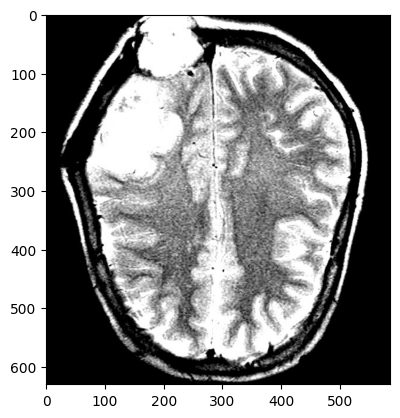

In [ ]:
pred_dir= "/content/drive/My Drive/DS Worksop/DS Workshop/Brain Tumor Prediction/Yes/y1.jpg"
img = cv2.imread(pred_dir)
plt.imshow(img)

In [ ]:
pred_dir

'/content/drive/My Drive/DS Worksop/DS Workshop/Brain Tumor Prediction/Yes/y1.jpg'

In [ ]:
features = extract_features(pred_dir)
features = features.reshape(1,-1)
features.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 4. LogisticRegression expected <= 2.